In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Zomato data .csv")

In [5]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

data['rate'] = data['rate'].apply(handleRate)

In [7]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


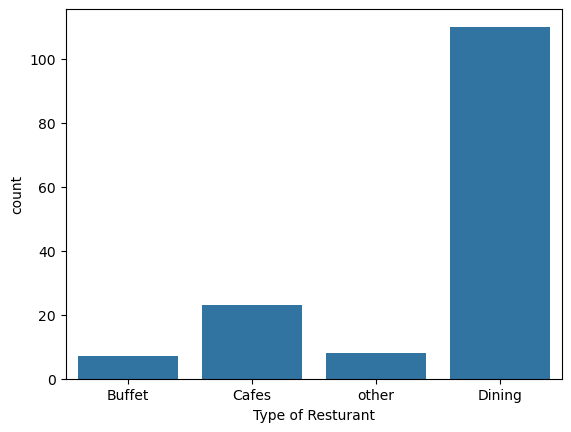

In [12]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of Resturant")
plt.show()

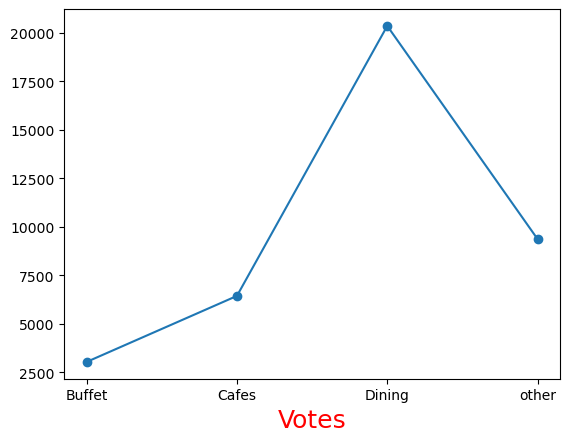

In [15]:
grouped_data = data.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result, marker="o")
plt.xlabel("Type of Resturant", c="red", size=18)
plt.xlabel("Votes", c="red", size=18)
plt.show()

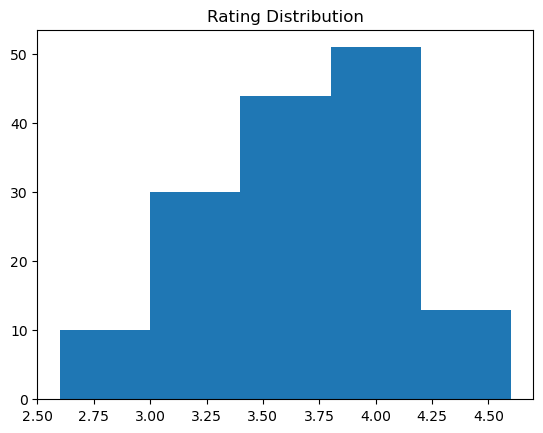

In [24]:
plt.hist(data['rate'], bins=5)
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

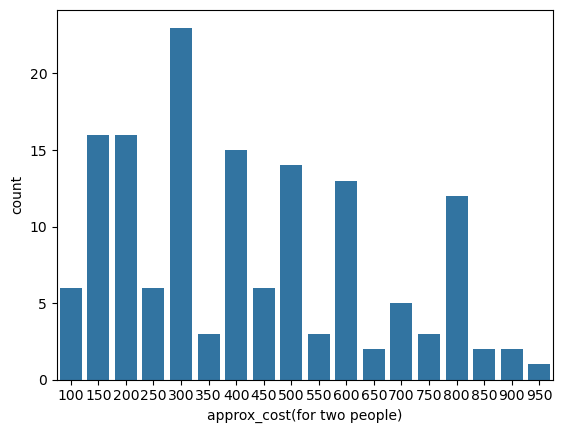

In [25]:
couple_data = data["approx_cost(for two people)"]
sns.countplot(x=couple_data)

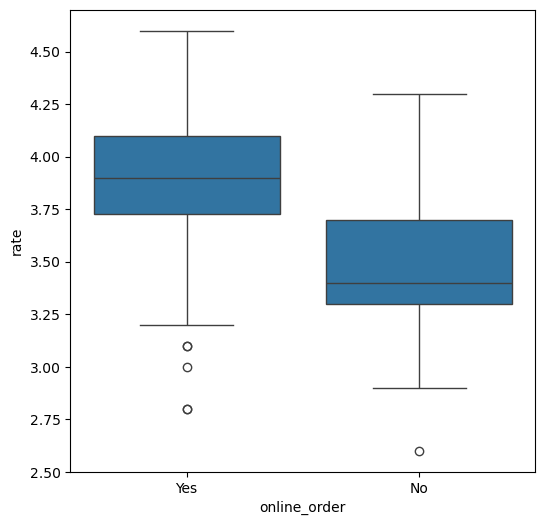

In [30]:
plt.figure(figsize = (6,6))
sns.boxplot(x="online_order", y="rate", data=data)
plt.show()

In [31]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


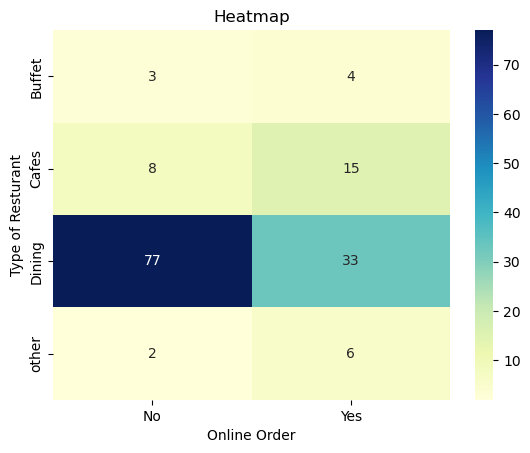

In [37]:
pivot_table = data.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type of Resturant")
plt.show()